In [1]:
%run "../Notebooks/initialization.ipynb"
%run "../Notebooks/Input_selection_functions.ipynb"
%run "../Notebooks/Stitching_clean.ipynb"
%run "../Notebooks/Visualization_functions.ipynb"
%run "../Notebooks/Downsampling_and_outliers_functions.ipynb"
%run "../Notebooks/Evaluation_functions.ipynb"
%load_ext autoreload

loading directory file
----------------------------------------
loaded variables from initialization file: 
> myparams, myconfiguration_file
> list_picked_id_source, list_picked_id_target
> data_folder
----------------------------------------


In this notebook we use combined methods from previous to get to a point in which we can compare the result we obtained with the model, either as point clouds either as meshes.

# THE MODEL

## load solid file ".stl"

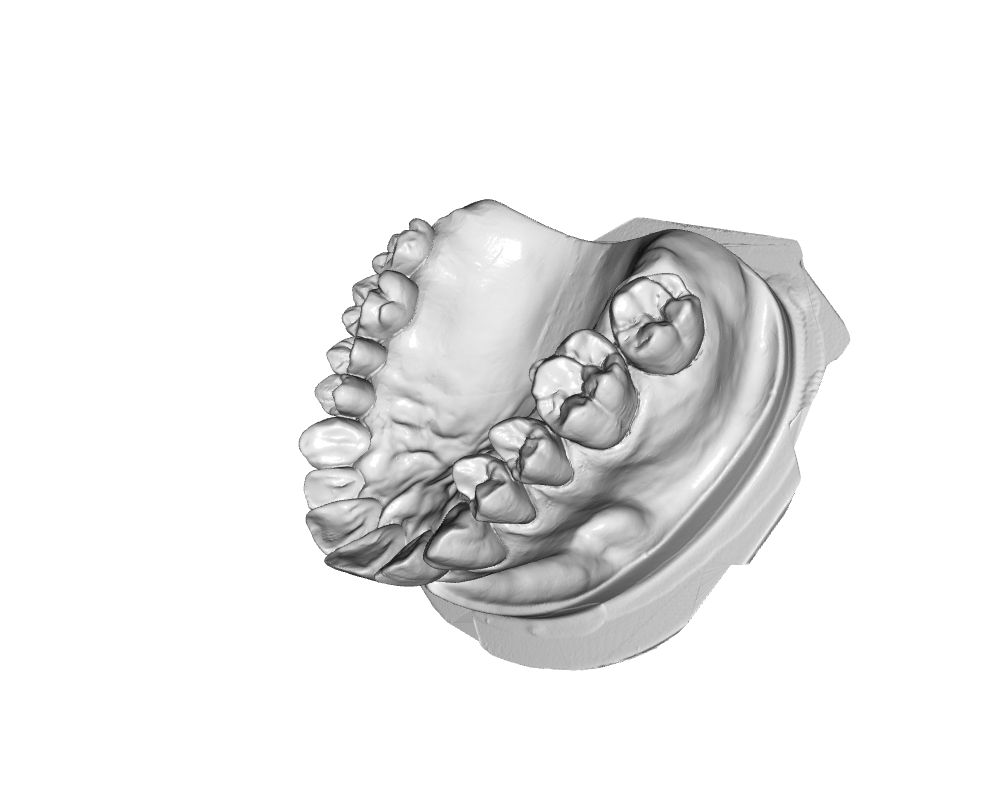

In [2]:
model_mesh = o3d.io.read_triangle_mesh("dental.stl")
model_mesh.compute_vertex_normals()
#o3d.visualization.draw_geometries([mesh], mesh_show_back_face=True)
custom_draw_geometry([model_mesh],
                     mytitle = "original model",
                     #params = myparams,  
                     #configuration_file = myconfiguration_file, 
                     take_screen_shot = True,
                     rotate = False)
Im(filename=last_file(".png"),
  width = 600, height = 400) 

## convert it to point cloud

In [3]:
model_pcd = o3d.geometry.PointCloud()
model_pcd.points = model_mesh.vertices
model_pcd.colors = model_mesh.vertex_colors
model_pcd.normals = model_mesh.vertex_normals

## visualize it 

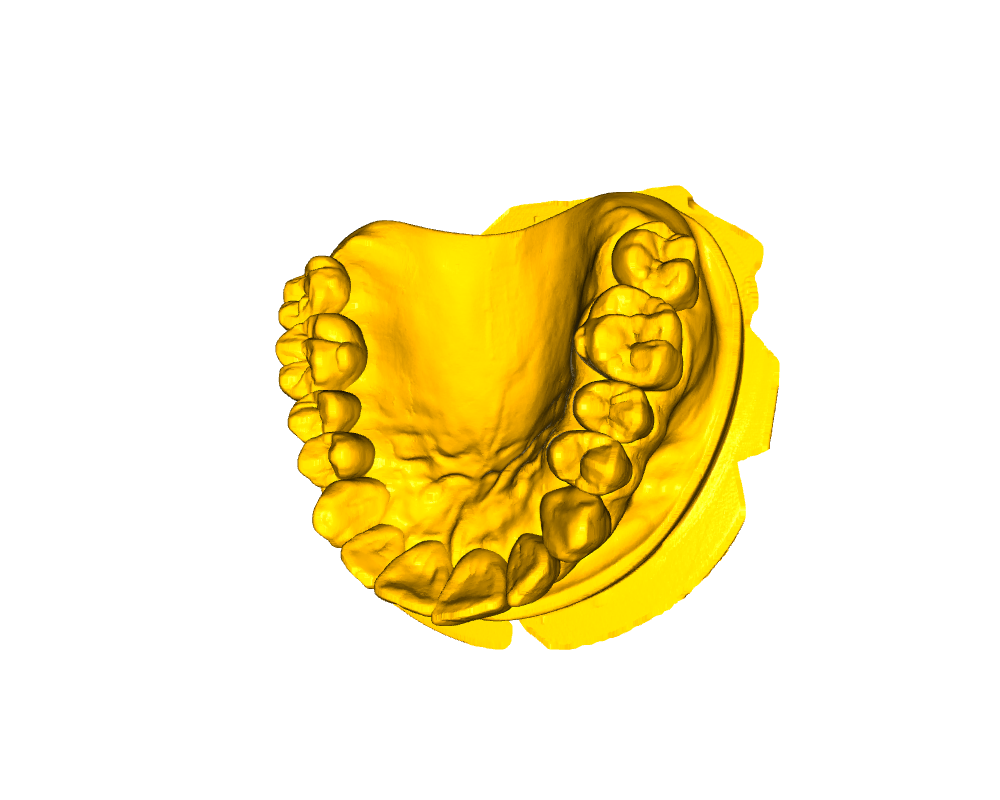

In [4]:
model_pcd.paint_uniform_color([1, 0.706, 0])
custom_draw_geometry(model_pcd,
                     mytitle = "original_model_pcd",
                     #params = myparams,  # parameter for camera point view, json file via pressing P
                     #configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False)
Im(filename=last_file(".png"),
  width = 500, height = 400) 

In [5]:
print (f"model_pcd contains {len(np.asarray(model_pcd.points))} points")

model_pcd contains 3379896 points


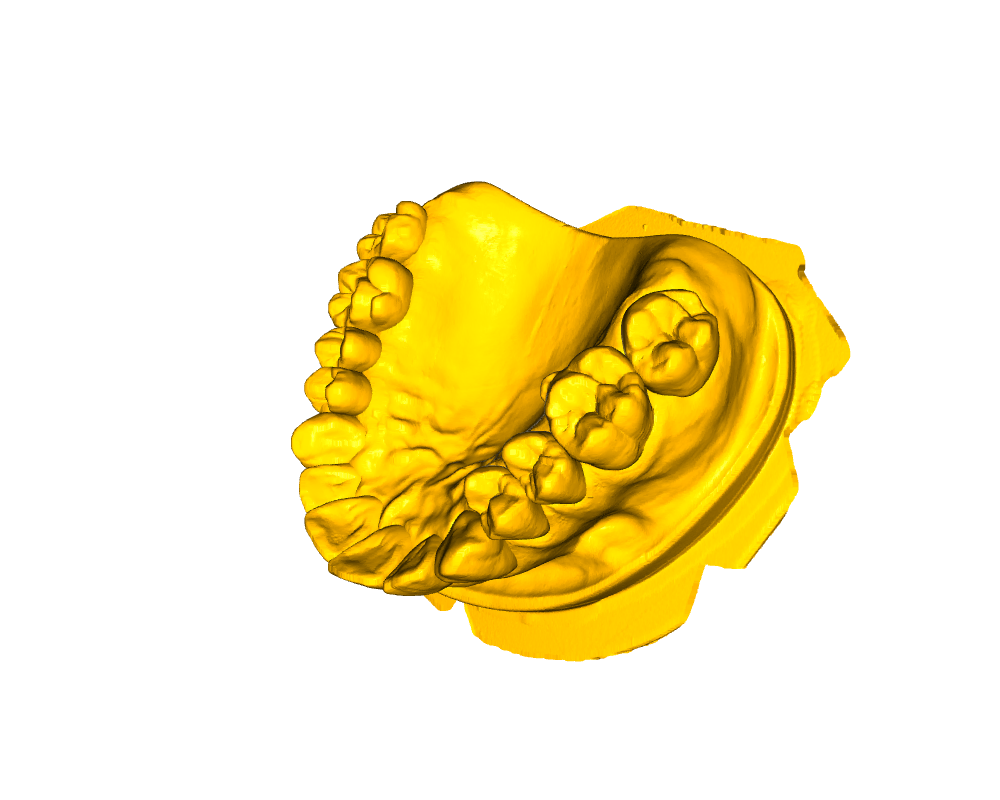

In [6]:
filesearch = last_file_containing("full_scaled_model", ".pcd")
if filesearch is None:
    scale_factor = 1000
    trans_scale = np.asarray([[scale_factor, 0.0, 0.0, 0.0], 
                                 [0.0, scale_factor, 0.0, 0.0],
                                 [0.0, 0.0, scale_factor, 0.0], 
                                 [0.0, 0.0, 0.0, 1.0]])

    temp_model_mesh = copy.deepcopy(model_pcd)
    temp_model_mesh.transform(trans_scale)
    
    #save
    o3d.io.write_point_cloud("full_scaled_model.pcd", temp_model_mesh)


name = "full_scaled_model.pcd"  
scaled_model= o3d.io.read_point_cloud(name)
scaled_model = scaled_model.paint_uniform_color([1, 0.706, 0]) 
custom_draw_geometry(scaled_model,
                     mytitle = "full_scaled_model",
                     #params = myparams,  # parameter for camera point view, json file via pressing P
                     #configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False,
                     #onewindow = True
                    )
Im(filename=last_file_containing("full_scaled_model",".png"),
  width = 500, height = 400) 

## elaborate the model

In [7]:
# CROP THE MODEL
temp_model_mesh = copy.deepcopy(model_mesh)
demo_crop_geometry(temp_model_mesh)

Demo for manual geometry cropping
1) Press 'Y' twice to align geometry with negative direction of y-axis
2) Press 'K' to lock screen and to switch to selection mode
3) Drag for rectangle selection,
   or use ctrl + left click for polygon selection
4) Press 'C' to get a selected geometry and to save it
5) Press 'F' to switch to freeview mode


PointCloud with 129071 points.


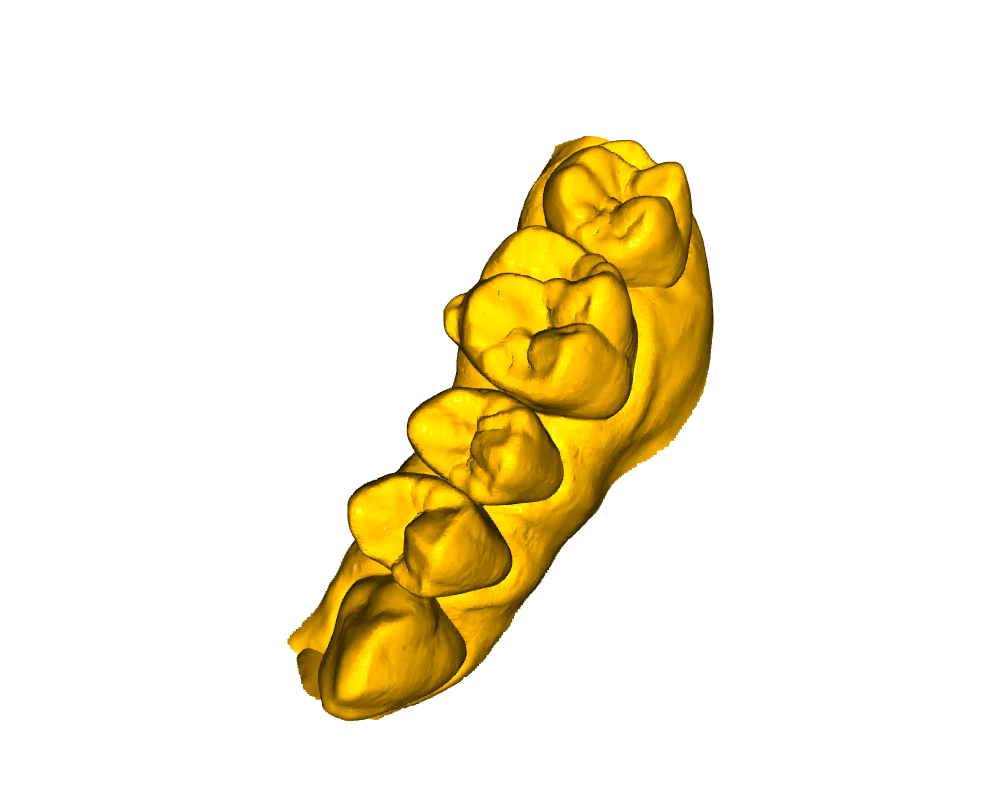

In [11]:
# LOAD MODEL CROPPED as PointCloud
last_model_cropped = o3d.io.read_point_cloud(
                                            last_file_containing("model_cropped", extension = '.ply')
                                            )
last_model_cropped.paint_uniform_color([1, 0.706, 0])                                            
print (last_model_cropped)
custom_draw_geometry(last_model_cropped,
                     mytitle = "Model_cropped",
                     #params = myparams, 
                     #configuration_file = myconfiguration_file, 
                     take_screen_shot = True,
                     rotate = False,
                     #onewindow = True
                    )
Im(filename=last_file(".png"),
  width = 500, height = 400) 

In [12]:
filesearch = last_file_containing("scaled_model_cropped", ".pcd")
filesearch

'./scaled_model_cropped.pcd'

## Scaling

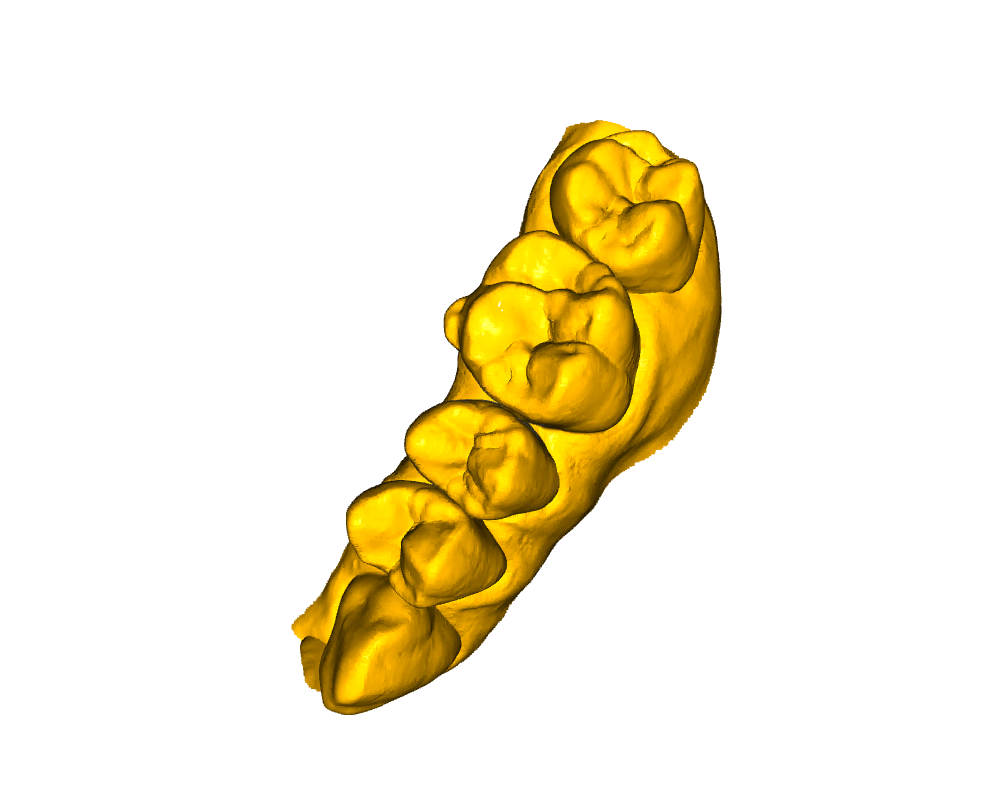

In [13]:
if filesearch is None:
    scale_factor = 1000
    trans_scale = np.asarray([[scale_factor, 0.0, 0.0, 0.0], 
                                 [0.0, scale_factor, 0.0, 0.0],
                                 [0.0, 0.0, scale_factor, 0.0], 
                                 [0.0, 0.0, 0.0, 1.0]])

    temp_model_mesh = copy.deepcopy(last_model_cropped)
    temp_model_mesh.transform(trans_scale)
    
    #save
    o3d.io.write_point_cloud("scaled_model_cropped.pcd", temp_model_mesh)


name = "scaled_model_cropped.pcd"  #for cropped one. "cropped_6.ply"
scaled_model_cropped= o3d.io.read_point_cloud(name)
scaled_model_cropped = scaled_model_cropped.paint_uniform_color([1, 0.706, 0]) 
custom_draw_geometry(scaled_model_cropped,
                     mytitle = "scaled_model_cropped",
                     #params = myparams,  # parameter for camera point view, json file via pressing P
                     #configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False,
                     #onewindow = True
                    )
Im(filename=last_file_containing("scaled_model_cropped",".png"),
  width = 500, height = 400) 

* scaled_model_cropped is a POINT CLOUD that we can use to compare to our point cloud

# Compare the model to our results

we can use either the mesh, which is elaborated, or the last pointcloud after cluster removal.

## 1- Comparing Point Cloud to Point Cloud

### Load reconstructed point cloud

After cluster cleaning 

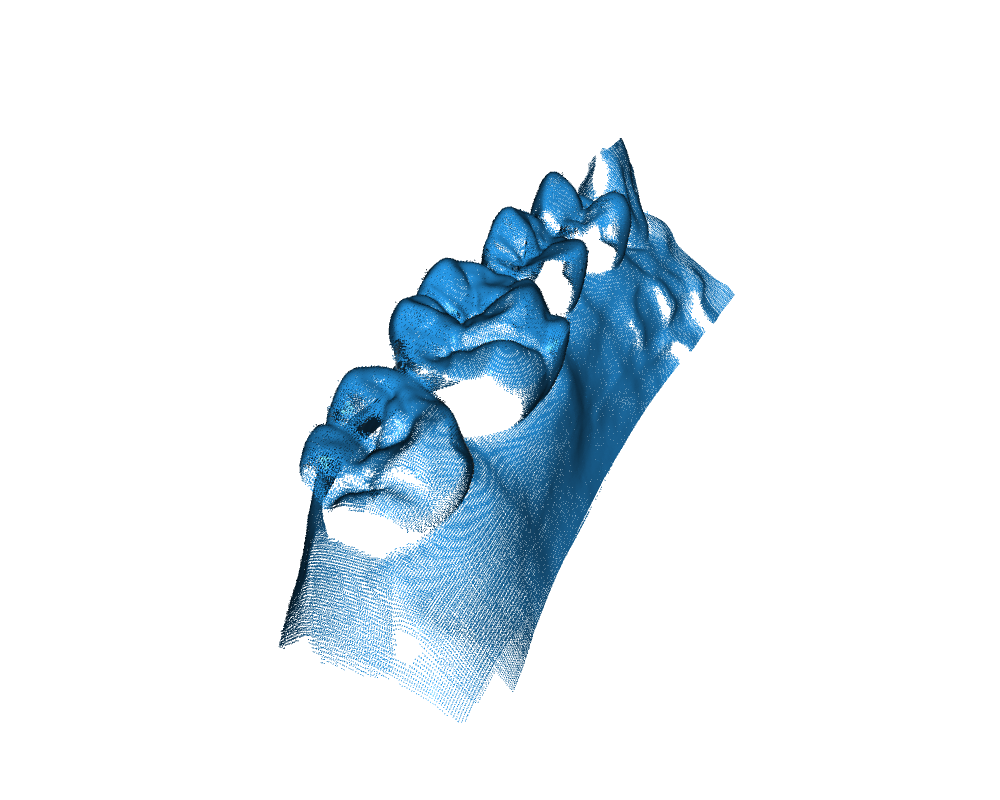

In [15]:
full_st_pcd= o3d.io.read_point_cloud("complete_cluster_3.pcd")
custom_draw_geometry(full_st_pcd,
                     mytitle = "complete_cluster_3",
                     #params = myparams, 
                     #configuration_file = myconfiguration_file,
                     take_screen_shot = True,
                     rotate = False,
                     #onewindow = True
                    )
Im(filename=last_file(".png"),
  width = 500, height = 400) 

To speed up the process and make it easy for the p2p icp registration, we use a cropped version of our point cloud.

In [17]:
# CROP 
temp_st_pcd = copy.deepcopy(full_st_pcd)
demo_crop_geometry(temp_st_pcd)

Demo for manual geometry cropping
1) Press 'Y' twice to align geometry with negative direction of y-axis
2) Press 'K' to lock screen and to switch to selection mode
3) Drag for rectangle selection,
   or use ctrl + left click for polygon selection
4) Press 'C' to get a selected geometry and to save it
5) Press 'F' to switch to freeview mode


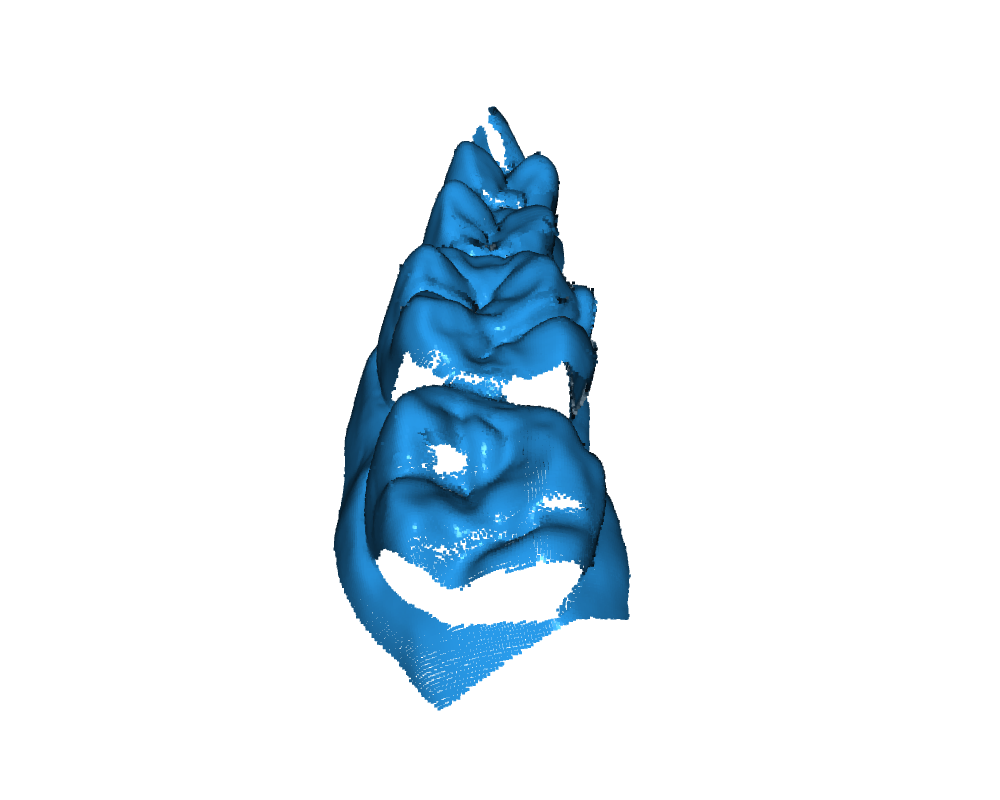

In [18]:
#LOAD
st_pcd= o3d.io.read_point_cloud("upcropped_1.ply")
custom_draw_geometry(st_pcd,
                     mytitle = "upcropped_1",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False,
                     #onewindow = True
                    )
Im(filename=last_file_containing("upcropped_1",".png"),
  width = 500, height = 400) 

In [159]:
list_stitches = [scaled_model_cropped ,st_pcd]
lables = ["model_pc","stitched_pc"]

In [21]:
# number of point clouds
get_num_points(list_stitches, print_statement = True)

number of points in clouds
(0, 129071)
(1, 299291)


[129071, 299291]

Note that we are working on heavily downsampled models

In [92]:
## create list of improving transformations 
list_cool_transformations = []
list_picked_id_source = []
list_picked_id_target = []

### execute manual registration p2p icp

in the visualization you need to pick 3 (and only 3) points in each geometry, try to zoom in and be "precise"

In [96]:
transf,new_picked_id_source,new_picked_id_target,registration,list_stitches = full_evaluation_pipeline(
                                                                             #input 
                                                                             list_stitches = list_stitches,
                                                                             labels_stitches = lables,
                                                                             color_stitches = [[1, 0.706, 0],[0, 0.651, 0.929]],

                                                                             #plotting 
                                                                             params = myparams,  # parameter for camera point view, json file via pressing P
                                                                             configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                                                                             take_screen_shot = True,
                                                                             rotate = False,
                                                                             onewindow = True,

                                                                             #scaling
                                                                             scaling_needed = False,
                                                                             scale_factor = 1000,
    
                                                                             #downsampling
                                                                             voxels = [0.1,0.2],

                                                                             #evaluation 
                                                                             threshold = 0.03,
                                                                             #picked_id_source = list_picked_id_source[1],
                                                                             #picked_id_target = list_picked_id_target[1],

                                                                             #statements
                                                                             print_statements = True,
                                                                             visualization_on = True
                                                                            )

(255, 180.03, 0)
(0, 166.005, 236.895)
[Open3D INFO] Picked point #26384 (-35., -19., 44.) to add in queue.
[Open3D INFO] Picked point #66329 (-31., -17., 42.) to add in queue.
[Open3D INFO] No point has been picked.
[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #22657 (-27., -28., 42.) to add in queue.

[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #18437 (12., 5.1, 43.) to add in queue.
[Open3D INFO] Picked point #18315 (11., 2.3, 39.) to add in queue.
[Open3D INFO] Picked point #8152 (0.7, 5.2, 38.) to add in queue.

[26384, 66329, 22657]
Compute a rough transform using the correspondences given by user
Perform point-to-point ICP refinement
RegistrationResult with fitness=2.522718e-03, inlier_rmse=2.220727e-02, and correspondence_set size of 191
Access transformation to get result.

RegistrationResult with fitness=2.522718e-03, inlier_rmse=2.220727e-02, and correspondence_set size of 191
Access transformation to get result.
[[ -0.48464362   

In [97]:
picked_id_source.append(new_picked_id_source)
picked_id_target.append(new_picked_id_target)

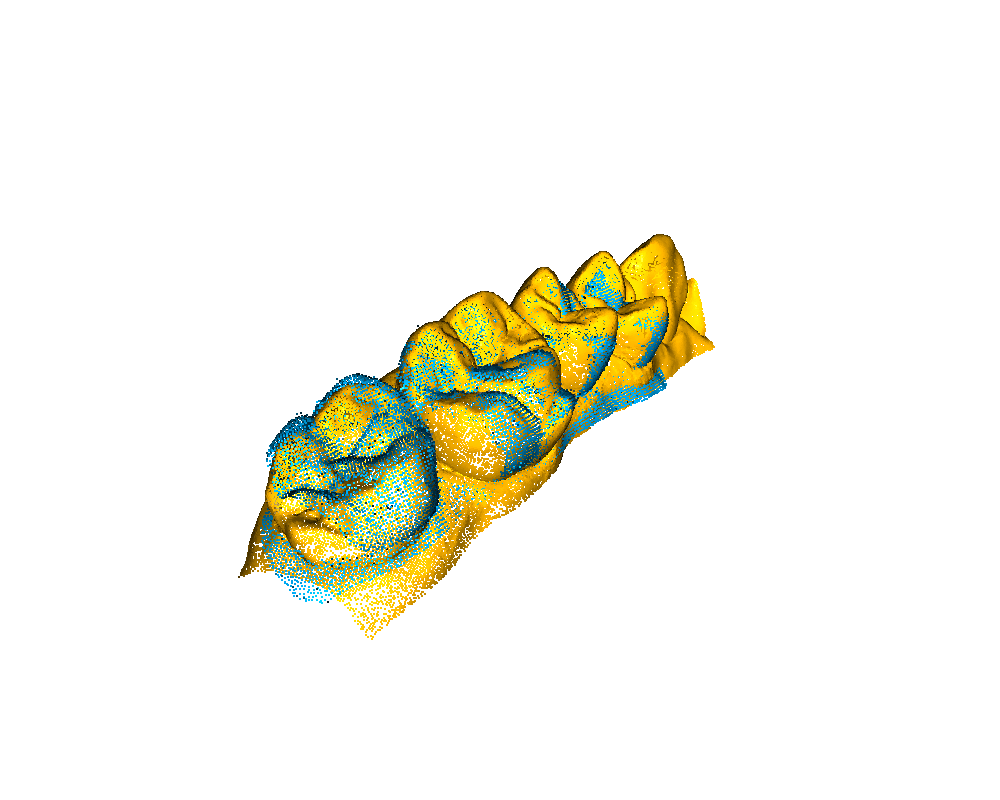

In [100]:
## if you have printed an image of the last visualization you can see it here
Im(filename=last_file(".png"),
  width = 800)#, height = 400) 

We notice that this is only an approximate transformation... can we make it better? maybe feeding it as initial transformation to the traditional ICP?

In [101]:
# append to list of transformations
list_cool_transformations.append(transf)

### Visualize how the last transformation looks on the full point cloud model and full stitch

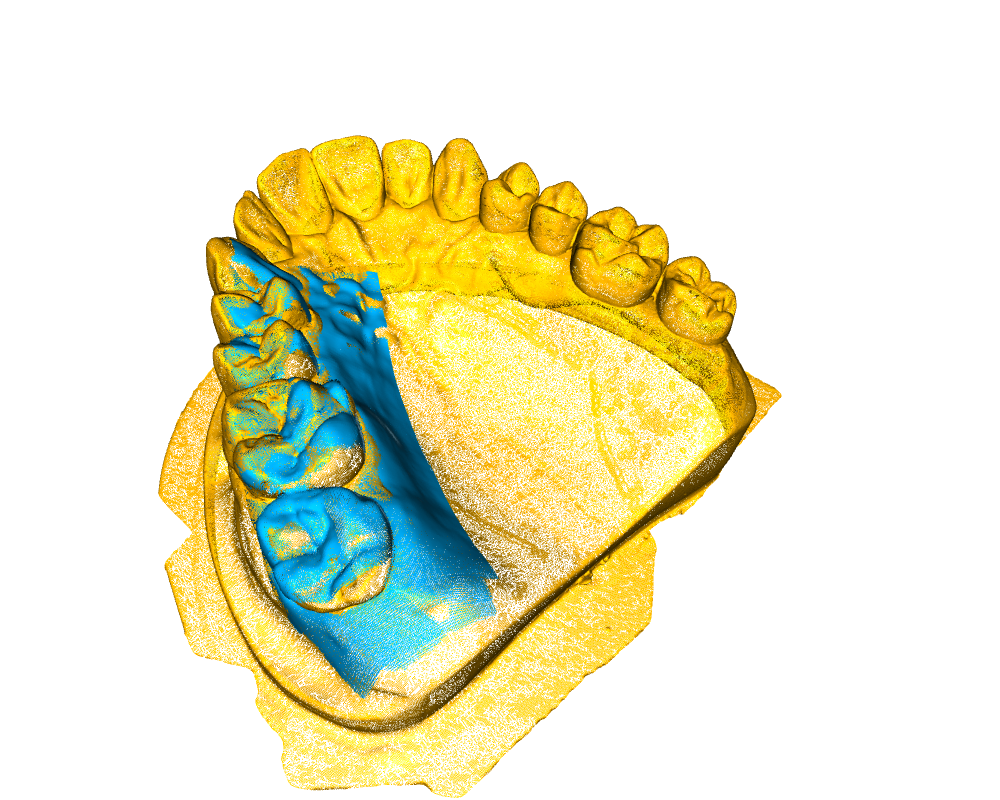

In [103]:
#build the final newpointcloud and eventually save it
stitched_model_reconstruction = save_registration_result(scaled_model, 
                                         full_st_pcd, 
                                         list_cool_transformations[-1], 
                                         title = "icp_manual_registration_full_pcls", 
                                         save_result = True,
                                         visualize_result = True)
## if you have printed an image of the last visualization you can see it here
Im(filename=last_file_containing("icp_manual_registration_full_pcls", ".png"),
  width = 500, height = 400) 

In [105]:
# to ease recording 
custom_draw_geometry(stitched_model_reconstruction,
                     mytitle = "stitched_model_reconstruction",
                     params = myparams,  # parameter for camera point view, json file via pressing P
                     configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = False,
                     rotate = "interactive")

[Open3D WARNING] GLFW Error: The GLFW library is not initialized


### Improve alignment

After getting an approximate solution with the manual alignment, we feed the found transformation in further icp. 

In [128]:
results_improving_icp = []

In [132]:
print(len(list_cool_transformations))

13


--------------------------------------------------------------------------------
iteration 1
model_pc PointCloud with 3379896 points.
stitched_pc PointCloud with 488502 points.
PointCloud with 509294 points.
PointCloud with 293729 points.
removing outliers

POINT-TO-PLANE ICP registration is applied on original point
distance threshold 0.200.
number of points in clouds
(0, 509294)
(1, 293729)
Transformation is:
[[ -0.42936695   0.89689573  -0.10593428  18.08900141]
 [ -0.73091052  -0.4139897   -0.54257012  -4.68199364]
 [ -0.53048452  -0.15553319   0.83330402 -14.77113242]
 [  0.           0.           0.           1.        ]]
overlapping points :  58251
RegistrationResult with fitness=1.143760e-01, inlier_rmse=1.100730e-01, and correspondence_set size of 58251
Access transformation to get result.


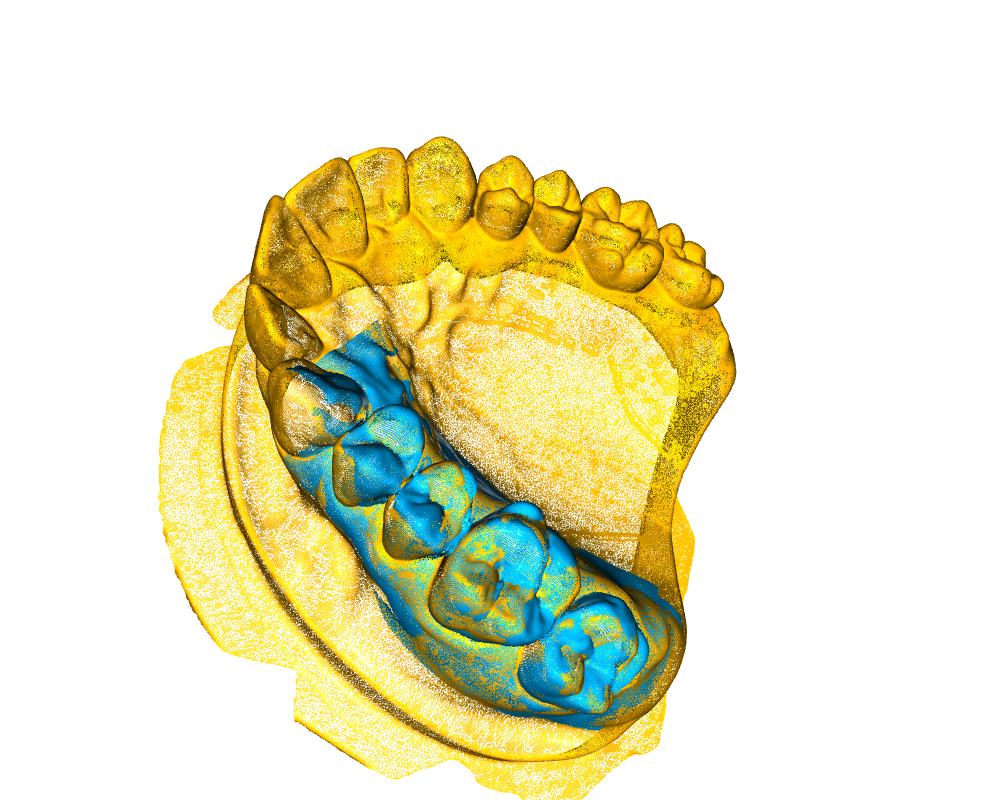

In [134]:
num_iterations = 1
for i in range(num_iterations):
    print (dash)
    print (f"iteration {i+1}")
    improving_manual_icp([scaled_model,full_st_pcd],
                         list_cool_transformations,
                         results_improving_icp,
                         downsample_voxel_size = 0.05,
                         voxel_size=0.1,

                         visualization_on = False,
                         print_statements = True
                        )

Im(filename=last_file(".png"),
width = 500, height = 400) 

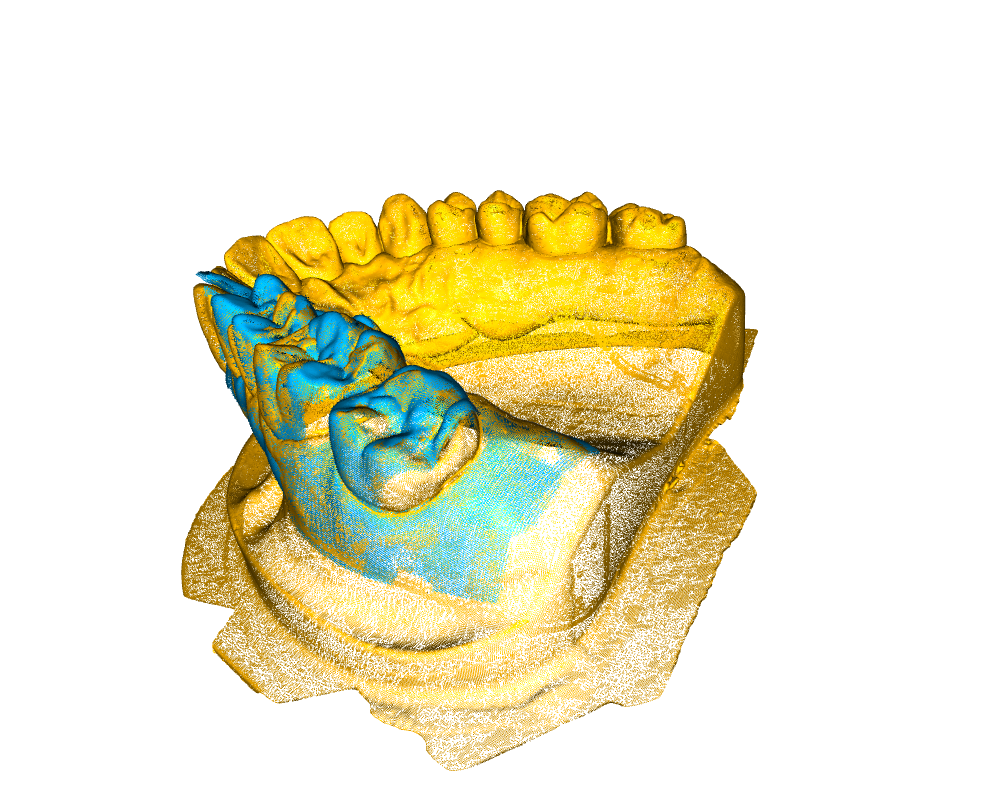

In [135]:
#build the final newpointcloud and eventually save it
final_pcl = save_registration_result(scaled_model, 
                                         full_st_pcd, 
                                         list_cool_transformations[-1], 
                                         title = "improved_icp_full_pcls", 
                                         save_result = True,
                                         visualize_result = True)
## if you have printed an image of the last visualization you can see it here
Im(filename=last_file_containing("improved_icp_full_pcls", ".png"),
  width = 500, height = 400) 

In [138]:
list_cool_transformations[-1]

array([[ -0.42936695,   0.89689573,  -0.10593428,  18.08900141],
       [ -0.73091052,  -0.4139897 ,  -0.54257012,  -4.68199364],
       [ -0.53048452,  -0.15553319,   0.83330402, -14.77113242],
       [  0.        ,   0.        ,   0.        ,   1.        ]])

In [137]:
tstring = mytimestamp()

custom_draw_geometry(final_pcl,
                     mytitle = tstring+ "improved_icp_full_pcls",
                     #params = myparams,  
                     #configuration_file = myconfiguration_file, 
                     take_screen_shot = False,
                     rotate = "interactive")

# after manual changing in visualization mode
#newest = last_file_containing(tstring+"improved_icp_full_pcls", extension = '.png')
#Im(filename=newest,width = 800)

[Open3D WARNING] GLFW Error: The GLFW library is not initialized


## trying recording

In [21]:
# this kills the kernell..

In [19]:
list_stitches = [scaled_model_cropped ,st_pcd]
lables = ["model_pc","stitched_pc"]

In [20]:
transf,new_picked_id_source,new_picked_id_target,registration,list_stitches = full_evaluation_pipeline_with_recording(
                                                                             #input 
                                                                             list_stitches = list_stitches,
                                                                             labels_stitches = lables,
                                                                             color_stitches = [[1, 0.706, 0],[0, 0.651, 0.929]],

                                                                             #plotting 
                                                                             params = myparams,  # parameter for camera point view, json file via pressing P
                                                                             configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                                                                             take_screen_shot = True,
                                                                             rotate = False,
                                                                             onewindow = True,

                                                                             #scaling
                                                                             scaling_needed = False,
                                                                             scale_factor = 1000,
    
                                                                             #downsampling
                                                                             voxels = [0.1,0.2],

                                                                             #evaluation 
                                                                             threshold = 0.03,
                                                                             #picked_id_source = list_picked_id_source[1],
                                                                             #picked_id_target = list_picked_id_target[1],

                                                                             #statements
                                                                             print_statements = True,
                                                                             visualization_on = True
                                                                            )

(255, 180.03, 0)
(0, 166.005, 236.895)
[Open3D INFO] Picked point #21476 (-35., -19., 44.) to add in queue.
[Open3D INFO] Picked point #37114 (-30., -17., 42.) to add in queue.
[Open3D INFO] Picked point #9271 (-27., -28., 42.) to add in queue.

[Open3D INFO] No point has been picked.
[Open3D INFO] Picked point #275 (12., 5.4, 43.) to add in queue.
[Open3D INFO] Picked point #2874 (11., 2.0, 39.) to add in queue.
[Open3D INFO] Picked point #14251 (0.74, 5.2, 39.) to add in queue.

[21476, 37114, 9271]
Compute a rough transform using the correspondences given by user
Perform point-to-point ICP refinement
RegistrationResult with fitness=0.000000e+00, inlier_rmse=0.000000e+00, and correspondence_set size of 0
Access transformation to get result.

RegistrationResult with fitness=0.000000e+00, inlier_rmse=0.000000e+00, and correspondence_set size of 0
Access transformation to get result.
[[ -0.46501965   0.86769774  -0.17566262  19.53445481]
 [ -0.71669898  -0.48545585  -0.50067474  -6.9959

# 2 -Compare the meshes

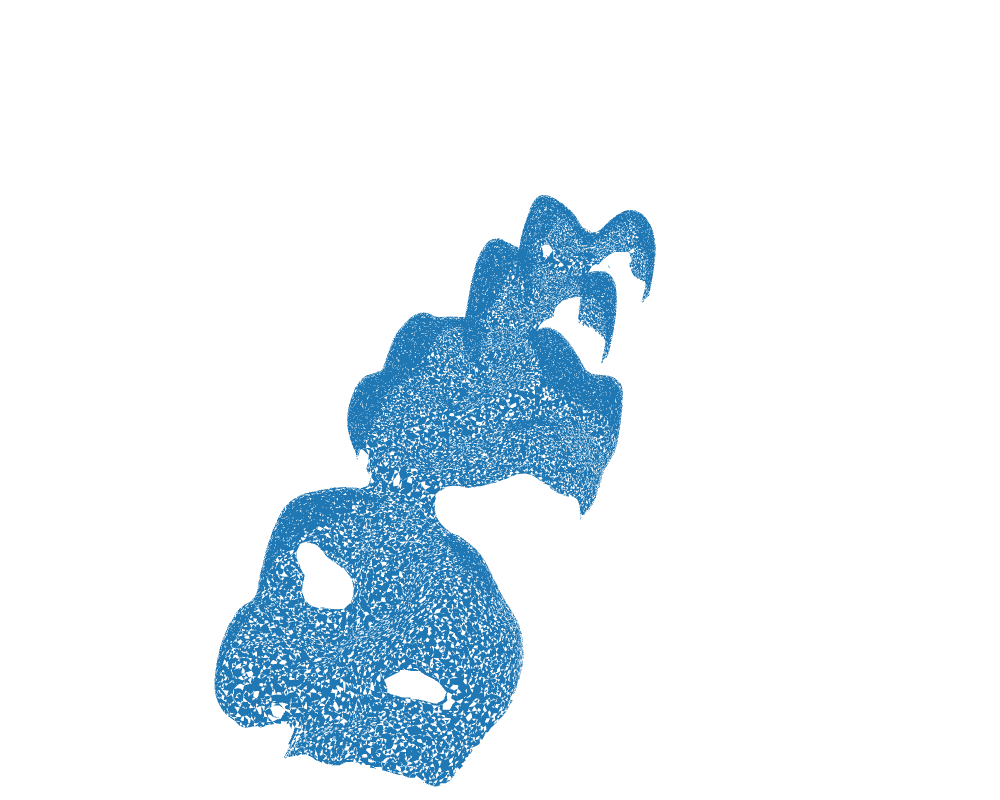

In [143]:
name = "cropped_6.ply"  #for cropped one. "cropped_6.ply" # complete_cluster_3.pcd
reconstructed_mesh_out=  o3d.io.read_triangle_mesh(name)
custom_draw_geometry(reconstructed_mesh_out,
                     mytitle = "cropped_6.ply",
                     #params = myparams,  # parameter for camera point view, json file via pressing P
                     #configuration_file = myconfiguration_file, # configuration file for properties, json file via pressing o
                     take_screen_shot = True,
                     rotate = False,
                     #onewindow = True
                    )
Im(filename=last_file_containing(name,".png"),
  width = 500, height = 400) 

Open3D does not seem to have a way to compare direclty one point cloud with a mesh or two meshes. Trimesh might have more options in this sense, but we havent had the time to dig into this other package. 